In [ ]:
pip install numpy

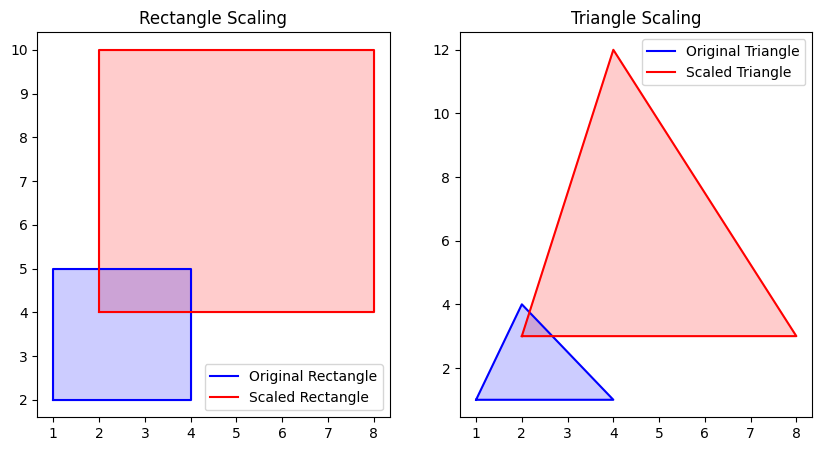

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Function to apply scaling transformation
def scale_object(vertices, sx, sy):
    # Define the scaling matrix
    scaling_matrix = np.array([[sx, 0],
                               [0, sy]])

    # Apply the scaling matrix to each vertex
    scaled_vertices = []
    for vertex in vertices:
        scaled_vertex = np.dot(scaling_matrix, vertex)
        scaled_vertices.append(scaled_vertex)

    return np.array(scaled_vertices)

# Example 1: Scaling a Rectangle
rectangle = np.array([[1, 2],  # A
                      [4, 2],  # B
                      [4, 5],  # C
                      [1, 5]]) # D

# Apply scaling (sx = 2, sy = 2)
scaled_rectangle = scale_object(rectangle, 2, 2)

# Example 2: Scaling a Triangle
triangle = np.array([[1, 1],  # P
                     [4, 1],  # Q
                     [2, 4]]) # R

# Apply scaling (sx = 2, sy = 3)
scaled_triangle = scale_object(triangle, 2, 3)

# Plotting the original and scaled objects
plt.figure(figsize=(10, 5))

# Plotting the original and scaled rectangle
plt.subplot(1, 2, 1)
plt.plot(*zip(*np.vstack([rectangle, rectangle[0]])), label="Original Rectangle", color='blue')
plt.plot(*zip(*np.vstack([scaled_rectangle, scaled_rectangle[0]])), label="Scaled Rectangle", color='red')
plt.fill(*zip(*scaled_rectangle), alpha=0.2, color='red')
plt.fill(*zip(*rectangle), alpha=0.2, color='blue')
plt.title("Rectangle Scaling")
plt.legend()

# Plotting the original and scaled triangle
plt.subplot(1, 2, 2)
plt.plot(*zip(*np.vstack([triangle, triangle[0]])), label="Original Triangle", color='blue')
plt.plot(*zip(*np.vstack([scaled_triangle, scaled_triangle[0]])), label="Scaled Triangle", color='red')
plt.fill(*zip(*scaled_triangle), alpha=0.2, color='red')
plt.fill(*zip(*triangle), alpha=0.2, color='blue')
plt.title("Triangle Scaling")
plt.legend()

plt.show()


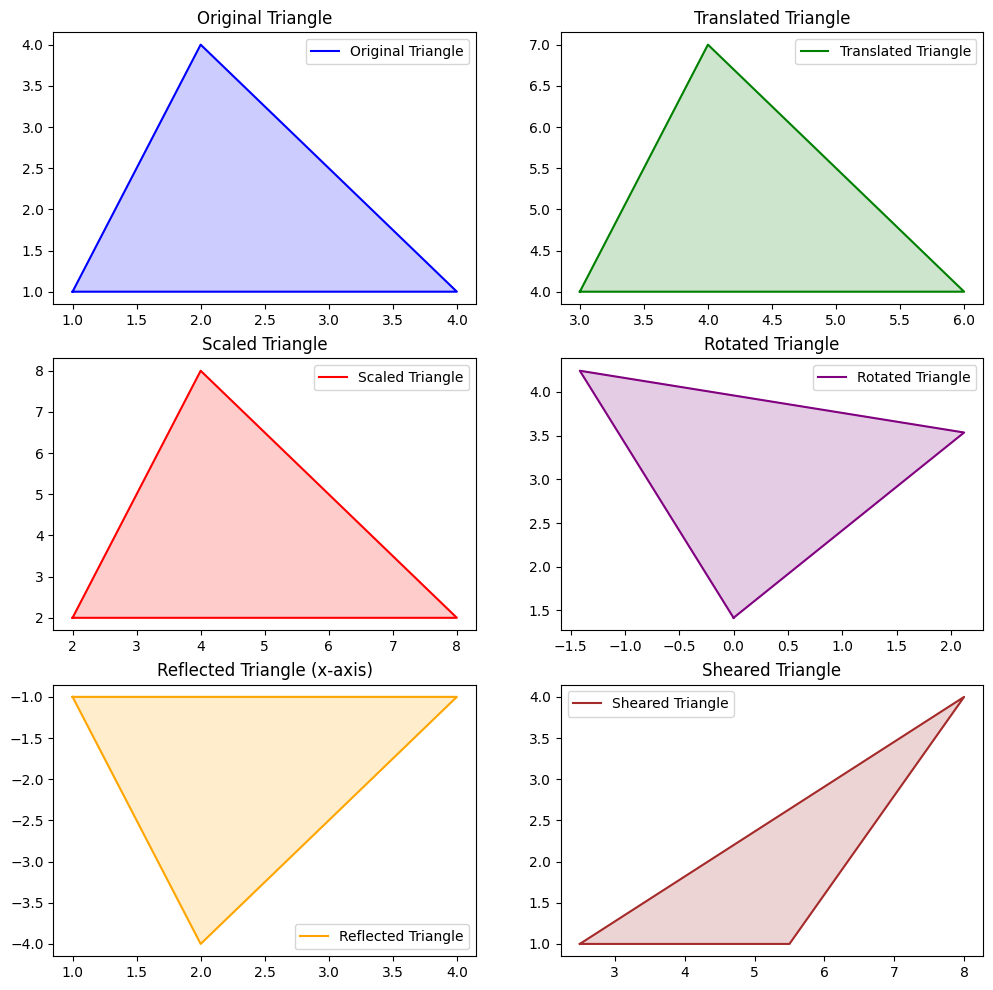

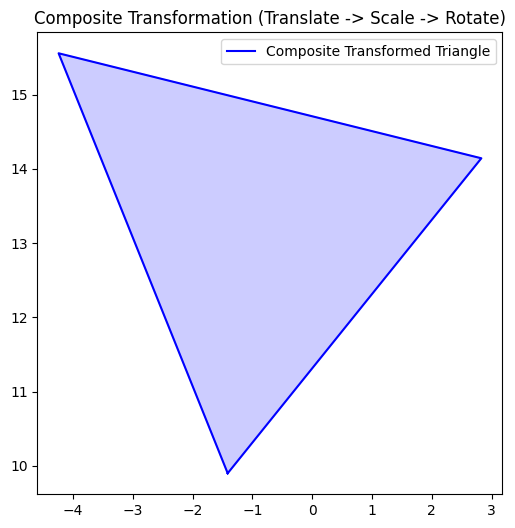

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Function to apply translation
def translate(vertices, tx, ty):
    translation_matrix = np.array([[1, 0, tx],
                                   [0, 1, ty],
                                   [0, 0, 1]])
    vertices = np.hstack([vertices, np.ones((vertices.shape[0], 1))])  # Add a column of ones for homogeneous coordinates
    translated_vertices = np.dot(vertices, translation_matrix.T)
    return translated_vertices[:, :-1]

# Function to apply scaling
def scale(vertices, sx, sy):
    scaling_matrix = np.array([[sx, 0, 0],
                               [0, sy, 0],
                               [0, 0, 1]])
    vertices = np.hstack([vertices, np.ones((vertices.shape[0], 1))])  # Add a column of ones for homogeneous coordinates
    scaled_vertices = np.dot(vertices, scaling_matrix.T)
    return scaled_vertices[:, :-1]

# Function to apply rotation
def rotate(vertices, angle):
    theta = np.radians(angle)
    rotation_matrix = np.array([[np.cos(theta), -np.sin(theta), 0],
                                [np.sin(theta), np.cos(theta), 0],
                                [0, 0, 1]])
    vertices = np.hstack([vertices, np.ones((vertices.shape[0], 1))])  # Add a column of ones for homogeneous coordinates
    rotated_vertices = np.dot(vertices, rotation_matrix.T)
    return rotated_vertices[:, :-1]

# Function to apply reflection (over the x-axis)
def reflect_x(vertices):
    reflection_matrix = np.array([[1, 0, 0],
                                  [0, -1, 0],
                                  [0, 0, 1]])
    vertices = np.hstack([vertices, np.ones((vertices.shape[0], 1))])  # Add a column of ones for homogeneous coordinates
    reflected_vertices = np.dot(vertices, reflection_matrix.T)
    return reflected_vertices[:, :-1]

# Function to apply shearing (along the x-axis)
def shear_x(vertices, shx):
    shearing_matrix = np.array([[1, shx, 0],
                                [0, 1, 0],
                                [0, 0, 1]])
    vertices = np.hstack([vertices, np.ones((vertices.shape[0], 1))])  # Add a column of ones for homogeneous coordinates
    sheared_vertices = np.dot(vertices, shearing_matrix.T)
    return sheared_vertices[:, :-1]

# Function to apply composite transformation (translation -> scaling -> rotation)
def composite_transform(vertices, tx, ty, sx, sy, angle):
    vertices = translate(vertices, tx, ty)  # Apply translation
    vertices = scale(vertices, sx, sy)     # Apply scaling
    vertices = rotate(vertices, angle)     # Apply rotation
    return vertices

# Example: Let's create a triangle for demonstration
triangle = np.array([[1, 1],  # P
                     [4, 1],  # Q
                     [2, 4]]) # R

# Apply individual transformations to the triangle
translated_triangle = translate(triangle, 2, 3)
scaled_triangle = scale(triangle, 2, 2)
rotated_triangle = rotate(triangle, 45)
reflected_triangle = reflect_x(triangle)
sheared_triangle = shear_x(triangle, 1.5)

# Apply composite transformation: Translate -> Scale -> Rotate
composite_triangle = composite_transform(triangle, 2, 3, 2, 2, 45)

# Plotting the original and transformed triangles
plt.figure(figsize=(12, 12))

# Plot the original triangle
plt.subplot(3, 2, 1)
plt.plot(*zip(*np.vstack([triangle, triangle[0]])), label="Original Triangle", color='blue')
plt.fill(*zip(*triangle), alpha=0.2, color='blue')
plt.title("Original Triangle")
plt.legend()

# Plot translated triangle
plt.subplot(3, 2, 2)
plt.plot(*zip(*np.vstack([translated_triangle, translated_triangle[0]])), label="Translated Triangle", color='green')
plt.fill(*zip(*translated_triangle), alpha=0.2, color='green')
plt.title("Translated Triangle")
plt.legend()

# Plot scaled triangle
plt.subplot(3, 2, 3)
plt.plot(*zip(*np.vstack([scaled_triangle, scaled_triangle[0]])), label="Scaled Triangle", color='red')
plt.fill(*zip(*scaled_triangle), alpha=0.2, color='red')
plt.title("Scaled Triangle")
plt.legend()

# Plot rotated triangle
plt.subplot(3, 2, 4)
plt.plot(*zip(*np.vstack([rotated_triangle, rotated_triangle[0]])), label="Rotated Triangle", color='purple')
plt.fill(*zip(*rotated_triangle), alpha=0.2, color='purple')
plt.title("Rotated Triangle")
plt.legend()

# Plot reflected triangle
plt.subplot(3, 2, 5)
plt.plot(*zip(*np.vstack([reflected_triangle, reflected_triangle[0]])), label="Reflected Triangle", color='orange')
plt.fill(*zip(*reflected_triangle), alpha=0.2, color='orange')
plt.title("Reflected Triangle (x-axis)")
plt.legend()

# Plot sheared triangle
plt.subplot(3, 2, 6)
plt.plot(*zip(*np.vstack([sheared_triangle, sheared_triangle[0]])), label="Sheared Triangle", color='brown')
plt.fill(*zip(*sheared_triangle), alpha=0.2, color='brown')
plt.title("Sheared Triangle")
plt.legend()

# Plot the composite transformation result
plt.figure(figsize=(6, 6))
plt.plot(*zip(*np.vstack([composite_triangle, composite_triangle[0]])), label="Composite Transformed Triangle", color='blue')
plt.fill(*zip(*composite_triangle), alpha=0.2, color='blue')
plt.title("Composite Transformation (Translate -> Scale -> Rotate)")
plt.legend()

plt.show()
